In [271]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import pandas as pd
import matplotlib as mpl
from sklearn.cluster import SpectralClustering

In [226]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [136]:
def initialize(G, S0 = 10):
    nodes = G.nodes
    for n in nodes:
        nodes[n]['state'] = 0
    seeds = [random.randint(0,len(nodes)-1) for i in range(S0)]
    for s in seeds: 
        nodes[s]['state'] = 1
    return seeds

In [139]:
def agent_based(G, lam = 0.3, a = 0.03):
    nodes = G.nodes
    states = []
    for n in G.nodes:
        states.append(G.nodes[n]['state'])
    for i in nodes:
        neigh = list(G.neighbors(i))
        for j in neigh:
            if nodes[j]['state'] == 1 and nodes[i]['state'] == 0:
                p = random.random()
                if p <= lam: 
                    nodes[i]['state'] = 1
            if (nodes[j]['state'] == 1 or nodes[j]['state'] == 2) and (nodes[i]['state'] == 1):
                p = random.random()
                if p <= a:
                    nodes[i]['state'] = 2       
    return Counter(states)

In [153]:
def run(T, G, lam = 0.3, a = 0.03):
    I = []
    S = []
    R = []
    for t in range(T):
        sim = agent_based(G, lam, a)
        I.append(sim[0])
        S.append(sim[1])
        R.append(sim[2])
    return I,S,R,T

In [154]:
G = nx.erdos_renyi_graph(1000, 0.03)
initialize(G)

[905, 441, 627, 861, 714, 204, 605, 163, 312, 909]

In [155]:
run(10, G)

([990, 370, 3, 0, 0, 0, 0, 0, 0, 0],
 [10, 511, 405, 161, 67, 29, 17, 9, 5, 2],
 [0, 119, 592, 839, 933, 971, 983, 991, 995, 998],
 10)

# Basic Tests

Text(0, 0.5, 'Number of Nodes')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


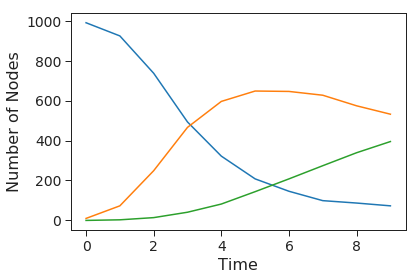

In [229]:
# a = 0.03, lambda = 0.3
G = nx.barabasi_albert_graph(1000, 2)
initialize(G)
simulation = run(10, G)

x = range(simulation[3])

I = simulation[0]
S = simulation[1]
R = simulation[2]

plt.plot(x, I)
plt.plot(x, S)
plt.plot(x, R)

plt.xlabel('Time')
plt.ylabel('Number of Nodes')

Text(0, 0.5, 'Number of Nodes')

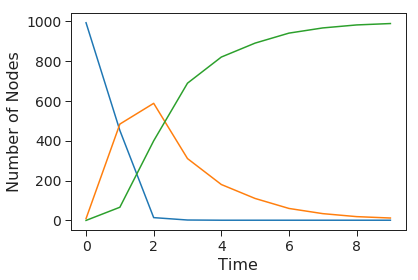

In [230]:
# a = 0.03, lambda = 0.3
G = nx.erdos_renyi_graph(1000, 0.02)
initialize(G)
simulation = run(10, G)

x = range(simulation[3])

I = simulation[0]
S = simulation[1]
R = simulation[2]

plt.plot(x, I)
plt.plot(x, S)
plt.plot(x, R)

plt.xlabel('Time')
plt.ylabel('Number of Nodes')

# Statistical Features

Text(0, 0.5, 'Number Spreaders')

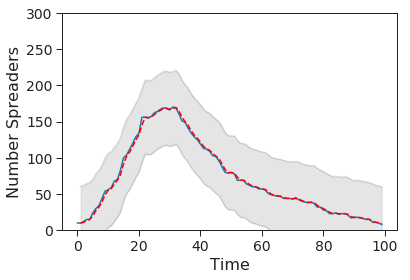

In [235]:
# a = 0.03, lambda = 0.05
G = nx.barabasi_albert_graph(1000, 2)
initialize(G)
simulation = run(100, G, lam = 0.05)

x = range(simulation[3])

S = simulation[1]

data = {'S': S}
df = pd.DataFrame(data = data)

mean = df.rolling(window = 2).mean()

std = int(df.std())
std_below = np.array([(i - std) for i in list(mean.S)])
std_above = np.array([(i + std) for i in list(mean.S)])

plt.plot(x, S)
plt.plot(x, mean, 'r--')
plt.plot(x, std_below, 'grey', alpha = 0.2)
plt.plot(x, std_above, 'grey', alpha = 0.2)
plt.ylim(0, 300)
plt.fill_between(x, std_below, std_above, color = 'grey', alpha = 0.2)

plt.xlabel('Time')
plt.ylabel('Number Spreaders')

In [206]:
int(std)

252

Text(0, 0.5, 'Number Spreaders')

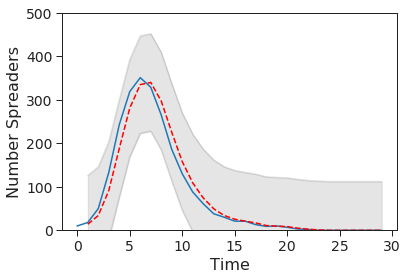

In [236]:
# a = 0.03, lambda = 0.05
G = nx.erdos_renyi_graph(1000, 0.02)
initialize(G)
simulation = run(30, G, lam = 0.05)

x = range(simulation[3])

S = simulation[1]

data = {'S': S}
df = pd.DataFrame(data = data)

mean = df.rolling(window = 2).mean()

std = int(df.std())
std_below = np.array([(i - std) for i in list(mean.S)])
std_above = np.array([(i + std) for i in list(mean.S)])

plt.plot(x, S)
plt.plot(x, mean, 'r--')
plt.plot(x, std_below, 'grey', alpha = 0.2)
plt.plot(x, std_above, 'grey', alpha = 0.2)
plt.ylim(0, 500)
plt.fill_between(x, std_below, std_above, color = 'grey', alpha = 0.2)
plt.xlabel('Time')
plt.ylabel('Number Spreaders')

# On to Eigenvalue Densities

In [287]:
def initialize(G, S0):
    nodes = G.nodes
    for n in nodes:
        nodes[n]['state'] = 0
    seeds = S0
    for s in seeds: 
        nodes[s]['state'] = 1

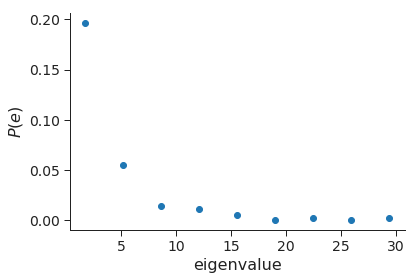

In [378]:
G = nx.barabasi_albert_graph(100, 2)
###################################
L = nx.laplacian_matrix(G).todense()
vals, vecs = np.linalg.eig(L)

eig = []
x = []
for i, value in enumerate(vals):
    eig.append(value)
    x.append(i)
    
#plt.plot(x, eig,'-')
    
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(min(eig), max(eig), num=10)

# histogram the data into these bins
density, _ = np.histogram(eig, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = bin_edges
x = ((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"eigenvalue", fontsize=16)
plt.ylabel(r"$P(e)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [382]:
vals, vecs = np.linalg.eig(L)
k = SpectralClustering(n_clusters = 7, assign_labels="discretize", random_state=0).fit(L)
groups = k.labels_
groups

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([1, 3, 3, 3, 6, 3, 6, 3, 3, 4, 4, 1, 1, 4, 1, 6, 1, 1, 1, 1, 3, 1,
       1, 1, 6, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1])

In [383]:
# trying the 3 labels
seeds = [0, 2, 4, 9] # chosen because they are frmo seperate groups
T = 10
d = {}
for s in seeds:
    all_S = np.array([np.zeros(50)])
    for t in range(T):
        initialize(G, [s])
        simulation = run(50, G, lam = 0.05)
        x = range(simulation[3])
        S = simulation[1]
        all_S = np.append(all_S, [S], axis = 0)
    d[s] = all_S

Counter({1: 67, 3: 7, 6: 4, 4: 22})

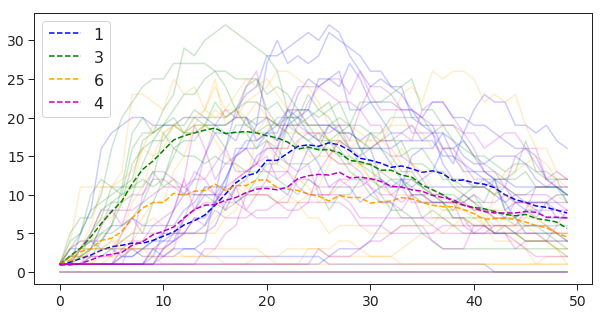

In [389]:
plt.figure(figsize = (10,5))

x = range(50)

mean = np.mean(d[0], axis = 0)
for row in d[0]:
    plt.plot(x, row, 'b', alpha = 0.2)
plt.plot(x, mean, 'b--', label = '1')

mean = np.mean(d[2], axis = 0)
for row in d[2]:
    plt.plot(x, row, color = 'green', alpha = 0.2)
plt.plot(x, mean, color = 'green', linestyle = '--', label = '3')

mean = np.mean(d[4], axis = 0)
for row in d[4]:
    plt.plot(x, row, 'orange', alpha = 0.2)
plt.plot(x, mean, color = 'orange', linestyle = '--', label = '6')

mean = np.mean(d[9], axis = 0)
for row in d[9]:
    plt.plot(x, row, color = 'm', alpha = 0.2)
plt.plot(x, mean, color = 'm', linestyle = '--', label = '4')

plt.legend()

Counter(groups)

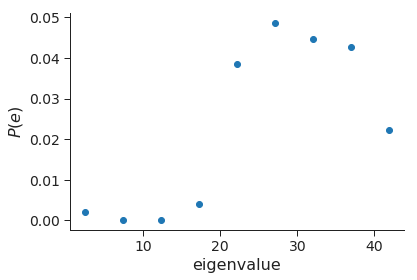

In [392]:
E = nx.erdos_renyi_graph(100, 0.3)
###################################
E_L = nx.laplacian_matrix(E).todense()
vals, vecs = np.linalg.eig(E_L)

eig = []
x = []
for i, value in enumerate(vals):
    eig.append(value)
    x.append(i)
    
#plt.plot(x, eig,'-')
    
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(min(eig), max(eig), num=10)

# histogram the data into these bins
density, _ = np.histogram(eig, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = bin_edges
x = ((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"eigenvalue", fontsize=16)
plt.ylabel(r"$P(e)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [396]:
vals, vecs = np.linalg.eig(E_L)
k = SpectralClustering(n_clusters = 2, assign_labels="discretize", random_state=0).fit(L)
groups = k.labels_
groups

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

Counter({2: 3, 0: 21, 4: 9, 3: 19, 9: 3, 1: 13, 10: 9, 6: 6, 7: 9, 8: 8})

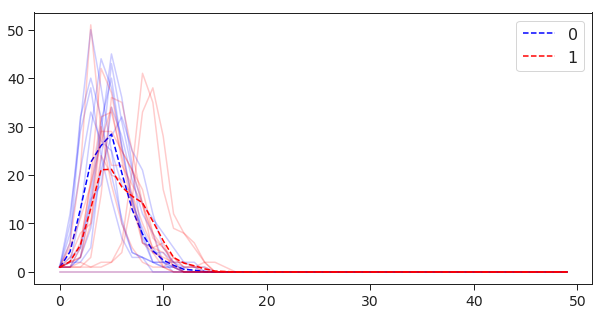

In [428]:
# trying the 3 labels
seeds = [0, 4] # chosen because they are frmo seperate groups
T = 10
d = {}
for s in seeds:
    all_S = np.array([np.zeros(50)])
    for t in range(T):
        initialize(E, [s])
        simulation = run(50, E, lam = 0.05)
        x = range(simulation[3])
        S = simulation[1]
        all_S = np.append(all_S, [S], axis = 0)
    d[s] = all_S
    
plt.figure(figsize = (10,5))

x = range(50)

mean = np.mean(d[0], axis = 0)
for row in d[0]:
    plt.plot(x, row, 'b', alpha = 0.2)
plt.plot(x, mean, 'b--', label = '0')

mean = np.mean(d[4], axis = 0)
for row in d[4]:
    plt.plot(x, row, 'r', alpha = 0.2)
plt.plot(x, mean, color = 'r', linestyle = '--', label = '1')

plt.legend()

Counter(groups)

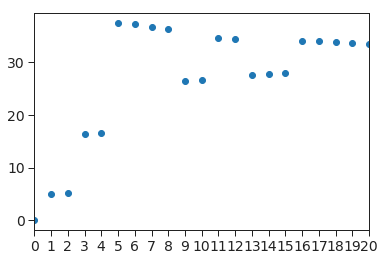

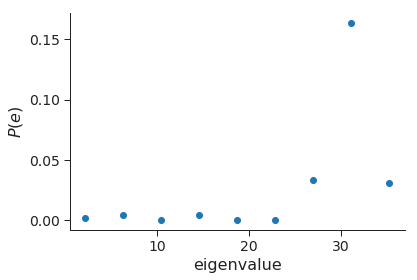

In [465]:
W = nx.watts_strogatz_graph(100, 30, 0.02)
###################################
W_L = nx.laplacian_matrix(W).todense()
vals, vecs = np.linalg.eig(W_L)

eig = []
x = []
for i, value in enumerate(vals):
    eig.append(value)
    x.append(i)
    
plt.plot(x, eig,'o')
plt.xticks(range(100))
plt.xlim(0,20)
    
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(min(eig), max(eig), num=10)

# histogram the data into these bins
density, _ = np.histogram(eig, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = bin_edges
x = ((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"eigenvalue", fontsize=16)
plt.ylabel(r"$P(e)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [466]:
vals, vecs = np.linalg.eig(W_L)
k = SpectralClustering(n_clusters = 4, assign_labels="discretize", random_state=0).fit(W_L)
groups = k.labels_
groups

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 2, 0, 1, 2, 1, 2, 1, 2, 3, 0, 3, 3, 2, 0, 3, 1, 0, 2, 3, 3, 0,
       1, 1, 0, 0, 3, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 3, 1, 3, 1, 3, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 3, 3, 3, 1,
       3, 3, 2, 0, 0, 3, 3, 0, 0, 2, 1, 3, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2,
       3, 2, 0, 2, 0, 0, 3, 2, 3, 3, 1, 3])

In [467]:
Counter(groups)

Counter({0: 30, 2: 17, 1: 24, 3: 29})

Counter({0: 30, 2: 17, 1: 24, 3: 29})

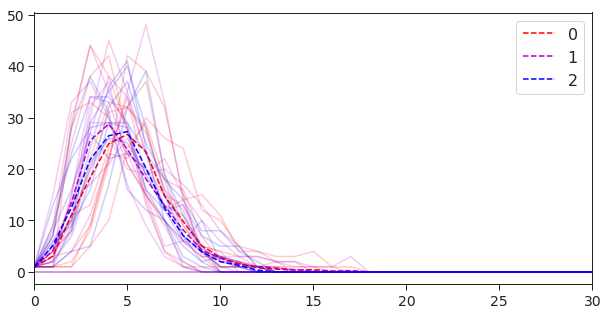

In [470]:
# trying the 3 labels
seeds = [0, 1, 3] # chosen because they are frmo seperate groups
T = 10
d = {}
for s in seeds:
    all_S = np.array([np.zeros(50)])
    for t in range(T):
        initialize(W, [s])
        simulation = run(50, W, lam = 0.05)
        x = range(simulation[3])
        S = simulation[1]
        all_S = np.append(all_S, [S], axis = 0)
    d[s] = all_S
    
plt.figure(figsize = (10,5))

x = range(50)

mean = np.mean(d[0], axis = 0)
for row in d[0]:
    plt.plot(x, row, 'r', alpha = 0.2)
plt.plot(x, mean, color = 'r', linestyle = '--', label = '0')

mean = np.mean(d[3], axis = 0)
for row in d[3]:
    plt.plot(x, row, color = 'm', alpha = 0.2)
plt.plot(x, mean, color = 'm', linestyle = '--', label = '1')

mean = np.mean(d[1], axis = 0)
for row in d[1]:
    plt.plot(x, row, color = 'b', alpha = 0.2)
plt.plot(x, mean, color = 'b', linestyle = '--', label = '2')

plt.xlim(0,30)

plt.legend()

Counter(groups)

In [432]:
#bit difficult here because I'm not sure these are meaningful cuts